# Multiple regression analysis using scikit learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from the Excel file
data = pd.read_csv('marketing_company_data.csv')

# Display the first few rows of the dataset
data.head()

,Campaign ID,Budget (USD),Clicks,Impressions,Conversions,Region,Date
0,1,8270,1943,92747,386,South,2023-01-01
1,2,1860,588,63752,460,South,2023-01-02
2,3,6390,3076,57573,347,East,2023-01-03
3,4,6191,2059,60101,189,East,2023-01-04
4,5,6734,2485,27646,190,East,2023-01-05


In [5]:
region_mapping = {
    'North': 1.0,
    'South': 2.0,
    'East': 3.0,
    'West': 4.0
}

# Apply the mapping to the 'Region' column
data['Region'] = data['Region'].map(region_mapping)

data.head()

,Campaign ID,Budget (USD),Clicks,Impressions,Conversions,Region,Date
0,1,8270,1943,92747,386,2.0,2023-01-01
1,2,1860,588,63752,460,2.0,2023-01-02
2,3,6390,3076,57573,347,3.0,2023-01-03
3,4,6191,2059,60101,189,3.0,2023-01-04
4,5,6734,2485,27646,190,3.0,2023-01-05


In [7]:
# Define the target variable (dependent variable)
y = data['Conversions']

# Define the feature variables (independent variables) 
X = data.drop(columns=['Campaign ID', 'Conversions', 'Date'])  # Drop non-relevant columns

# Display the feature matrix and target variable
print(X.head())
print(y.head())

   Budget (USD)  Clicks  Impressions  Region
0          8270    1943        92747     2.0
1          1860     588        63752     2.0
2          6390    3076        57573     3.0
3          6191    2059        60101     3.0
4          6734    2485        27646     3.0
0    386
1    460
2    347
3    189
4    190
Name: Conversions, dtype: int64


In [9]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and test sets
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 160, Test set size: 40


In [11]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Output the model's intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: 174.90395796917667
Slope: [9.35902304e-04 5.25651353e-03 8.03405884e-04 4.25711358e+00]


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 20008.62419552101
R-squared: 0.048874539635816006


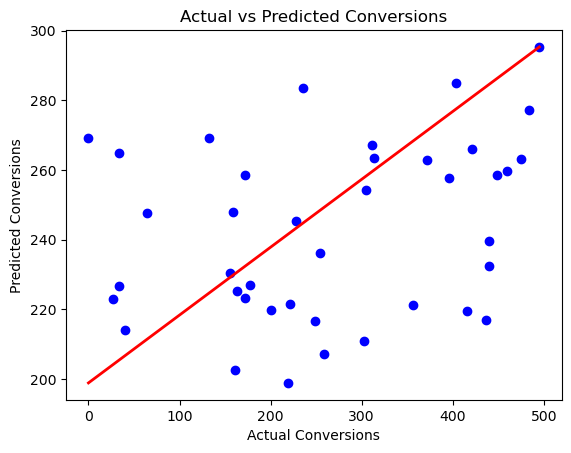

In [15]:
# Scatter plot of Actual vs Predicted conversions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)

plt.title('Actual vs Predicted Conversions')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.show()

### Mean Squared Error (MSE)
What it is: Think of MSE as a way to measure how "off" our predictions are compared to the actual values.
##### How to understand it:
Imagine you’re throwing darts at a target. Each dart represents a prediction. If your darts land close to the bullseye (the actual value), that’s good! A lower MSE means your darts (predictions) are hitting closer to the target.
In your case, an MSE of 20008.62 means that, on average, your predictions are a bit far from the actual values, similar to darts that are scattered around the target rather than hitting the center.
### R-squared (R²)
What it is: R-squared tells us how well our predictions explain what’s actually happening.
##### How to understand it:
Continuing with the dart analogy, if you hit the bullseye most of the time, that means your throws (predictions) are good and explain what you were aiming for very well. If most of your darts are all over the place and not really hitting the target, your predictions aren’t very helpful.
An R-squared value of 0.05 (or 5%) means that only 5% of what’s happening is explained by your predictions. This is very low! It’s like saying you only hit the target 5% of the time. The other 95% of the time, something else is going on that your predictions aren’t capturing.
##### Summary
MSE (20008.62): Your predictions are not very close to the actual values; they miss the mark quite a bit.
R-squared (0.05): Your predictions only explain a tiny part of what’s happening, meaning there’s a lot more going on that your model isn’t taking into account.
In simple terms, your model needs improvement to make better predictions!